# **PYTHON STATISTICS WITH PINGOUIN LIBRARIES**

Here you will see the use of libraries such as Pingouin to calculate important statistics from a dataset. 

The following code, samples and figures are taken from the Pingouin documentation, please check https://pingouin-stats.org/guidelines.html 

The datasets used for the examples are provided here for more details: https://github.com/raphaelvallat/pingouin/tree/master/pingouin/datasets

# **1.1 Anova**

Anova according to Wikipedia (https://en.wikipedia.org/wiki/Analysis_of_variance) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means.

The figure below shows the differnt approaches the Anova analysis can take. In the example below the comparison will be done using a Between analysis (left side). This analysis includes Anova and then Tukey-HSD 

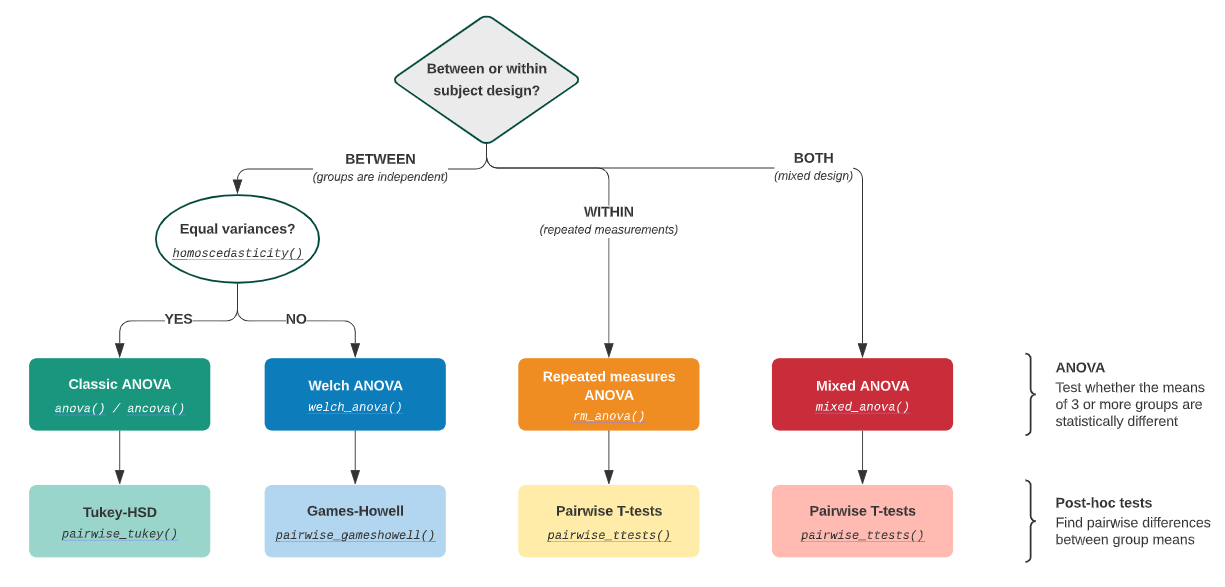

In [ ]:
!pip install pingouin

In [7]:
#You need 

import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')

# 2. If the groups have equal variances, we can use a regular one-way ANOVA
pg.anova(data=df, dv='Pain threshold', between='Hair color')


# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074068,1.525213
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.435577,-0.884182
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.414728,0.946285
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003708,-2.409395
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.789321,-0.554719
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036647,1.816432


**1.2. Correlation**

Text and figure taken from: https://pingouin-stats.org/guidelines.html#correlation

flowchart_correlations.svg

,n,r,CI95%,p-val,BF10,power
pearson,500,-0.010383,"[-0.1, 0.08]",0.816854,0.058,0.056138


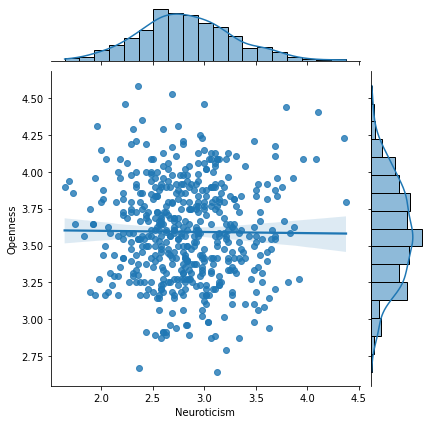

In [10]:
# The dataset used lists personality scores for 5 personalities and for 500
# participants. The original dataset is here: 
# https://github.com/raphaelvallat/pingouin/blob/master/pingouin/datasets/pairwise_corr.csv

#  Subject	Neuroticism	Extraversion	Openness	Agreeableness	Conscientiousness
#  1	      2.47917	    4.20833	      3.9375	  3.95833	      3.45833

import pingouin as pg
import seaborn as sns

# Load an example dataset with the personality scores of 500 participants
df = pg.read_dataset('pairwise_corr')

# 1.Test for bivariate normality (optional)
pg.multivariate_normality(df[['Neuroticism', 'Openness']])

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Neuroticism', y='Openness', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
pg.corr(df['Neuroticism'], df['Openness'], method='pearson')

**1.3. Non-parametric**

Figure taken from: https://pingouin-stats.org/guidelines.html#non-parametric

flowchart_nonparametric.svg

In [8]:
import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

# There are 4 independent groups in our dataset, we'll therefore use the Kruskal-Wallis test:
pg.kruskal(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172
